In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

/home/bhushan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
inputFile = './data/house5/channel_7.dat'
#inputFile = './data/house5/channel_7.dat_OnOFF.csv'

In [3]:
file_read = pd.read_csv(inputFile, sep=' ', names = ['Timestamp', 'Usage'])

In [4]:
print(file_read[:10])
print(file_read.index)

    Timestamp  Usage
0  1404059032      0
1  1404059038      0
2  1404059044      0
3  1404059050      0
4  1404059056      0
5  1404059062      0
6  1404059068      0
7  1404059074      0
8  1404059080      0
9  1404059086      0
RangeIndex(start=0, stop=1851917, step=1)


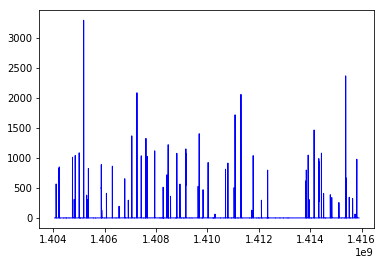

In [5]:
#plt.plot(file_read['Timestamp'][:10000], file_read['Usage'][:10000], color='blue', linewidth=3)
#file_read.plot(kind='series')
#file_read[['Timestap','Usage']].plot(kind='bar', ax=ax[0])
plt.plot(file_read['Timestamp'], file_read['Usage'],color='blue', linewidth=1)
plt.figure()
plt.show()

In [9]:
ax = file_read[['Usage'][:10]].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()


In [19]:
# Indexing data
file_read['Timestamp'] = pd.to_datetime(file_read['Timestamp'],unit='s')
file_read['Date'] = file_read['Timestamp'].dt.date
#file_read['Timestamp'] = pd.to_datetime(file_read['Timestamp'], format = '%Y-%m-%d')
indexed_df = file_read.set_index('Timestamp')
ts = indexed_df['Usage']
print(ts[:5], file_read['Date'][:5])

Timestamp
2014-06-29 16:23:52    0
2014-06-29 16:23:58    0
2014-06-29 16:24:04    0
2014-06-29 16:24:10    0
2014-06-29 16:24:16    0
Name: Usage, dtype: int64 0    2014-06-29
1    2014-06-29
2    2014-06-29
3    2014-06-29
4    2014-06-29
Name: Date, dtype: object


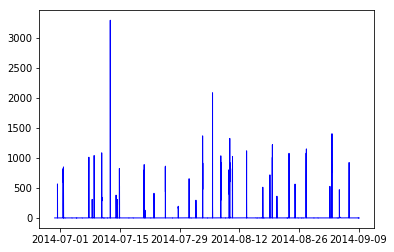

In [23]:
plt.plot(file_read['Timestamp'][:1000000], file_read['Usage'][:1000000], color='blue', linewidth=1)
plt.figure()
plt.show()

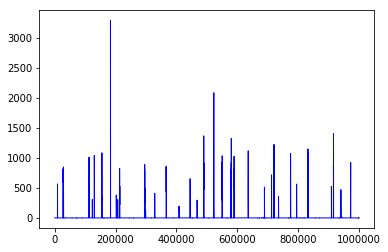

In [31]:
plt.plot(file_read['Usage'][:1000000], color='blue', linewidth=1)
plt.figure()
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/bhushan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/bhushan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


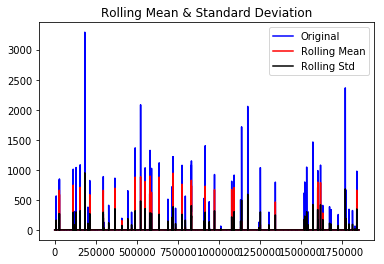

Results of Dickey-Fuller Test:


In [ ]:
test_stationarity(file_read['Usage'])